In [3]:
! pip install matplotlib pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/b3/92/a5e5133421b49e901a12e02a6a7ef3a0130e10d13db8cb657fdd0cba3b90/pandas-2.0.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached pandas-2.0.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata (18 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.0.3-cp311-cp311-macosx_10_9_x86_64.whl (11.6 MB)


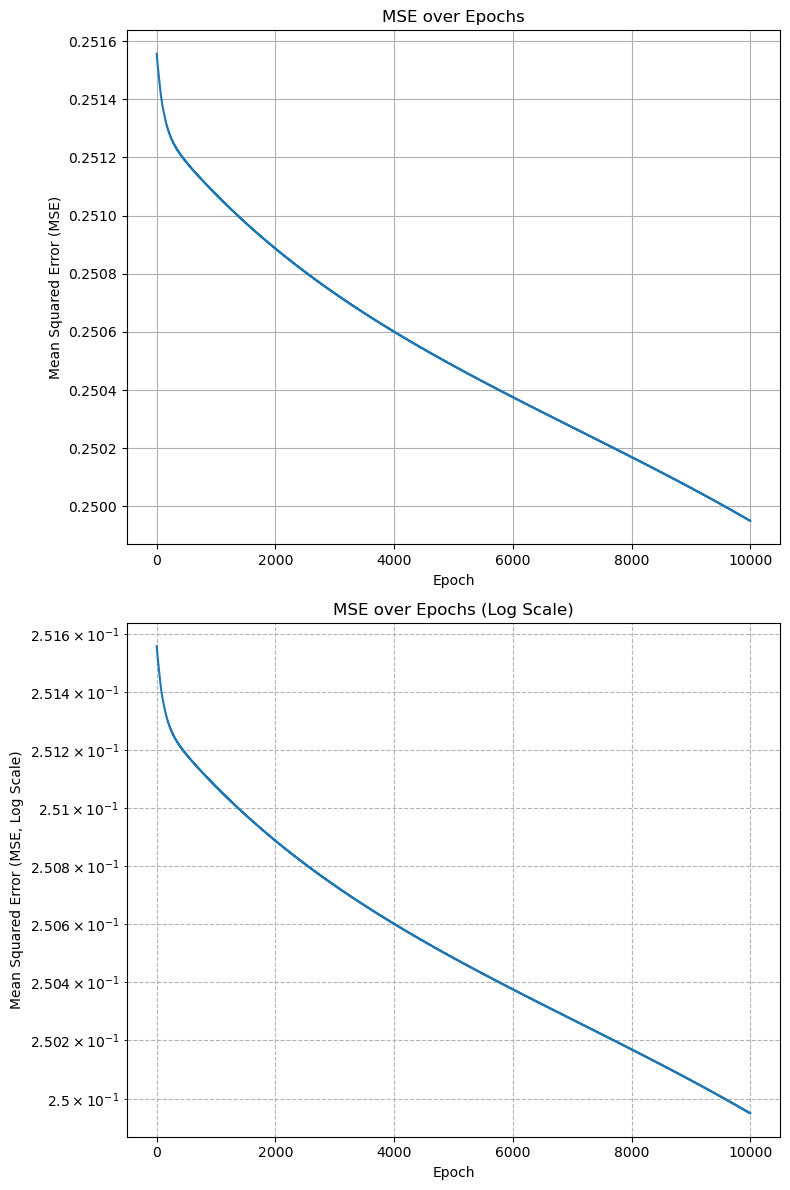

In [9]:
import csv
import matplotlib.pyplot as plt

# Read the CSV file into lists
epochs = []
mses = []

with open("plot_errors.csv", 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        epochs.append(float(row['Epoch']))
        mses.append(float(row[' MSE']))

# Create a 2x1 grid of subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Regular plot
axs[0].plot(epochs, mses)  # , marker='.')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Mean Squared Error (MSE)')
axs[0].set_title('MSE over Epochs')
axs[0].grid(True)

# Log-log plot
axs[1].plot(epochs, mses)  # , marker='.')
# axs[1].set_xscale('log')  # Uncomment if you want x-axis to be log scale
axs[1].set_yscale('log')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Mean Squared Error (MSE, Log Scale)')
axs[1].set_title('MSE over Epochs (Log Scale)')
axs[1].grid(True, which="both", ls="--", c='0.7')  # Grid for both major and minor ticks in log-log plot

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


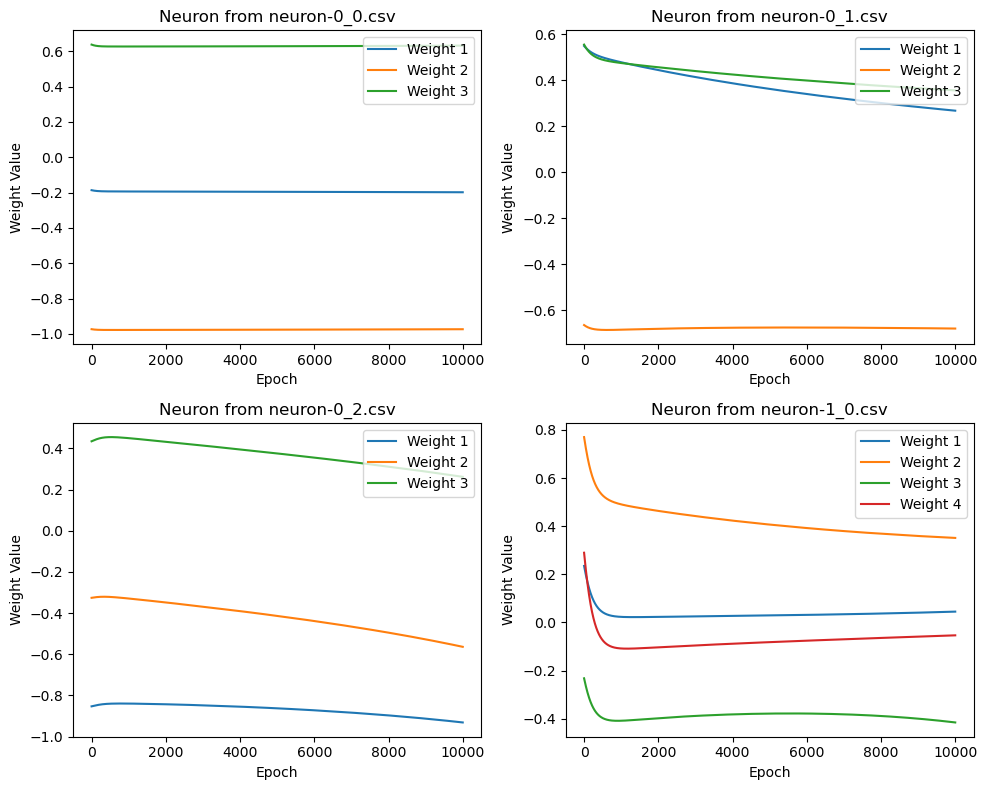

In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# List of filenames corresponding to each neuron
files = ["neuron-0_0.csv", "neuron-0_1.csv", "neuron-0_2.csv", "neuron-1_0.csv"]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for idx, file in enumerate(files):
    # Determine the position on the 2x2 grid
    row = idx // 2
    col = idx % 2

    # Read the CSV file into a list of lists
    with open(file, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)

    # Convert the list of lists to a numpy array for easy column-wise operations
    data_array = np.array(data, dtype=float).T

    # Plot each column (now a row because of the transpose) in the current subplot
    for i, column_data in enumerate(data_array):
        axs[row, col].plot(column_data, label=f"Weight {i + 1}")

    axs[row, col].set_title(f"Neuron from {file}")
    axs[row, col].legend()
    axs[row, col].set_xlabel("Epoch")
    axs[row, col].set_ylabel("Weight Value")
    axs[row, col].legend(loc='upper right')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

